# 1️⃣ Import Required Libraries
We start by importing essential Python libraries for data manipulation, analysis, and visualization:

- **pandas** & **numpy**: For data loading, cleaning, and manipulation.
- **matplotlib** & **seaborn**: For plotting charts and visualizations.
- Display settings are set to show all columns and a clean style for plots.

In [11]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 2️⃣ Load the Dataset
The cleaned Excel file is loaded into a Pandas DataFrame.

This gives us a quick look at:
- Number of rows and columns
- Column names
- First few rows to inspect the data


In [30]:

# Path to your cleaned Excel file
data_path = "../data/hospital_readmission_cleaned.xlsx"

# Load the Excel file
df = pd.read_excel(data_path)

# Quick check of the data
print("Shape of the dataset:", df.shape)
print("\nColumns in dataset:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())


Shape of the dataset: (45095, 19)

Columns in dataset: ['Year', 'Period of coverage', 'Breakdown', 'Level', 'Level description', 'Age Breakdown', 'Sex Breakdown', 'Diagnosis Breakdown', 'Method', 'Indicator value', 'Lower CI (95%)', 'Upper CI (95%)', 'Lower CI (99.8%)', 'Upper CI (99.8%)', 'Numerator', 'Denominator', 'Expected', 'Banding1', 'Warnings2']

First 5 rows:
       Year        Period of coverage Breakdown    Level Level description  \
0  2014/15  01/04/2014 to 31/03/2015   England  England           England   
1  2015/16  01/04/2015 to 31/03/2016   England  England           England   
2  2016/17  01/04/2016 to 31/03/2017   England  England           England   
3  2017/18  01/04/2017 to 31/03/2018   England  England           England   
4  2018/19  01/04/2018 to 31/03/2019   England  England           England   

  Age Breakdown Sex Breakdown    Diagnosis Breakdown Method  Indicator value  \
0           All       Persons  Stroke (I61* to I64*)  Trend             11.6   
1    

# 3️⃣ Initial Data Inspection
We inspect the dataset to understand its structure and quality:
- `df.info()` → Data types and non-null counts
- `df.isnull().sum()` → Check for missing values
- `df.describe().T` → Summary statistics of numeric columns
- `df.nunique()` → Count of unique values per column


In [29]:
# Check dataset info
df.info()

# Check for missing values
df.isnull().sum()

# Quick stats for numerical columns
df.describe()

# Unique values per column
df.nunique() 

<class 'pandas.DataFrame'>
RangeIndex: 45095 entries, 0 to 45094
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 45095 non-null  str    
 1   period_of_coverage   45095 non-null  str    
 2   breakdown            45095 non-null  str    
 3   level                45095 non-null  str    
 4   level_description    45095 non-null  str    
 5   age_breakdown        45095 non-null  str    
 6   sex_breakdown        45095 non-null  str    
 7   diagnosis_breakdown  45095 non-null  str    
 8   method               45095 non-null  str    
 9   indicator_value      45095 non-null  float64
 10  lower_ci_95%         45095 non-null  float64
 11  upper_ci_95%         45095 non-null  float64
 12  lower_ci_99.8%       45095 non-null  float64
 13  upper_ci_99.8%       45095 non-null  float64
 14  numerator            45095 non-null  object 
 15  denominator          45095 non-null  object 
 1

year                     11
period_of_coverage       11
breakdown                 9
level                   858
level_description       972
age_breakdown             1
sex_breakdown             3
diagnosis_breakdown       2
method                    1
indicator_value         501
lower_ci_95%            228
upper_ci_95%           1049
lower_ci_99.8%          186
upper_ci_99.8%         1324
numerator               374
denominator            1486
expected               3735
banding1                  5
warnings2                 1
dtype: int64

# 4️⃣ Clean Column Names
To make working with the dataset easier:
- Remove extra spaces
- Convert all column names to lowercase
- Replace spaces with underscores
- Remove parentheses


In [28]:
# Remove extra spaces and lowercase all column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
df.head()


,year,period_of_coverage,breakdown,level,level_description,age_breakdown,sex_breakdown,diagnosis_breakdown,method,indicator_value,lower_ci_95%,upper_ci_95%,lower_ci_99.8%,upper_ci_99.8%,numerator,denominator,expected,banding1,warnings2
0,2014/15,01/04/2014 to 31/03/2015,England,England,England,All,Persons,Stroke (I61* to I64*),Trend,11.6,11.3,11.9,11.1,12.0,6630,57268,6630.0,NaN,NaN
1,2015/16,01/04/2015 to 31/03/2016,England,England,England,All,Persons,Stroke (I61* to I64*),Trend,11.6,11.4,11.9,11.2,12.1,6816,58520,6774.9,NaN,NaN
2,2016/17,01/04/2016 to 31/03/2017,England,England,England,All,Persons,Stroke (I61* to I64*),Trend,11.7,11.4,11.9,11.2,12.1,6834,58586,6782.6,NaN,NaN
3,2017/18,01/04/2017 to 31/03/2018,England,England,England,All,Persons,Stroke (I61* to I64*),Trend,11.8,11.5,12.1,11.4,12.3,7049,59663,6907.3,NaN,NaN
4,2018/19,01/04/2018 to 31/03/2019,England,England,England,All,Persons,Stroke (I61* to I64*),Trend,12.2,11.9,12.5,11.8,12.7,7406,60672,7024.1,NaN,NaN


# 5️⃣ Univariate Analysis
Explore each variable individually:
- **Numeric variables**: distribution using histogram with KDE
- **Categorical variables**: count plots to see the frequency of categories
- **Proportions**: visualize percentage distribution of categorical variables like 'sex_breakdown'


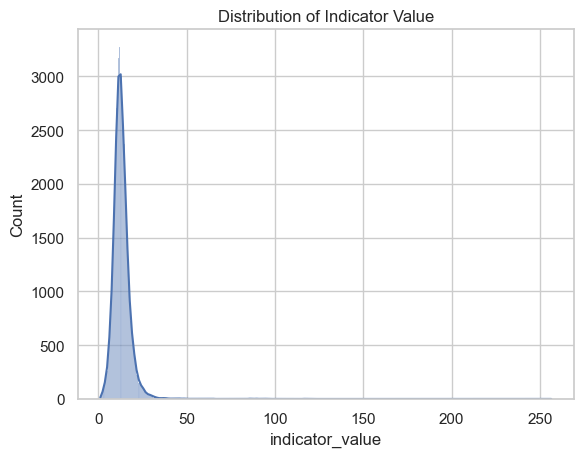

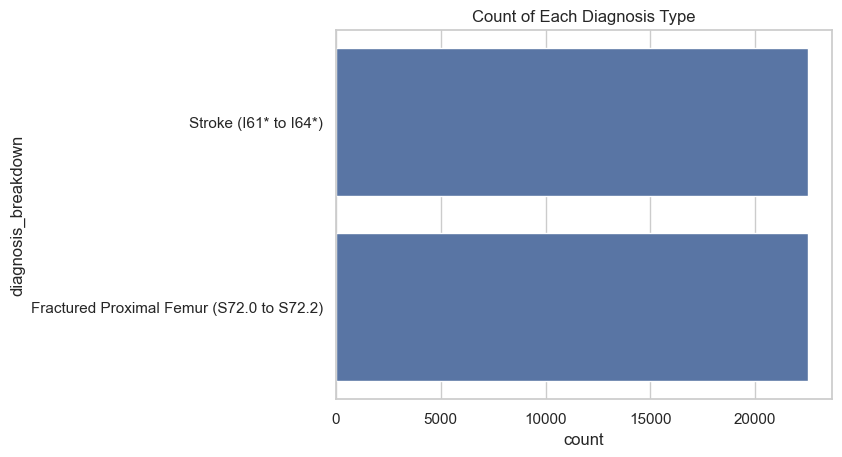

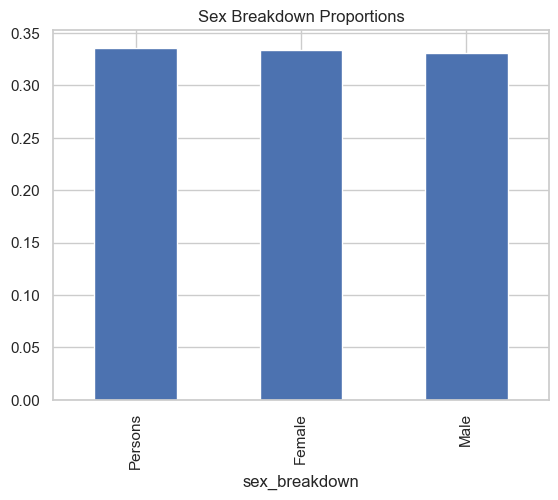

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Indicator Value
sns.histplot(df['indicator_value'], kde=True)
plt.title("Distribution of Indicator Value")
plt.show()

# Count plot of categorical column (e.g., Diagnosis Breakdown)
sns.countplot(y=df['diagnosis_breakdown'])
plt.title("Count of Each Diagnosis Type")
plt.show()

# Sex breakdown proportions
df['sex_breakdown'].value_counts(normalize=True).plot(kind='bar')
plt.title("Sex Breakdown Proportions")
plt.show()


# 6️⃣ Bivariate Analysis
Explore relationships between two variables:
- Boxplots of numeric variables against categorical variables to check distribution and outliers
- Example: Indicator Value vs Age Breakdown, Indicator Value vs Diagnosis Breakdown


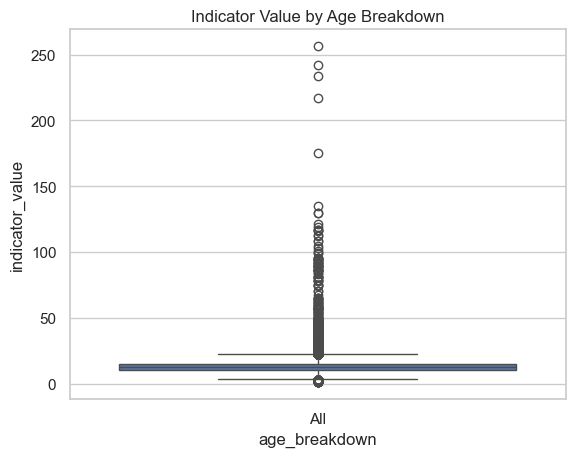

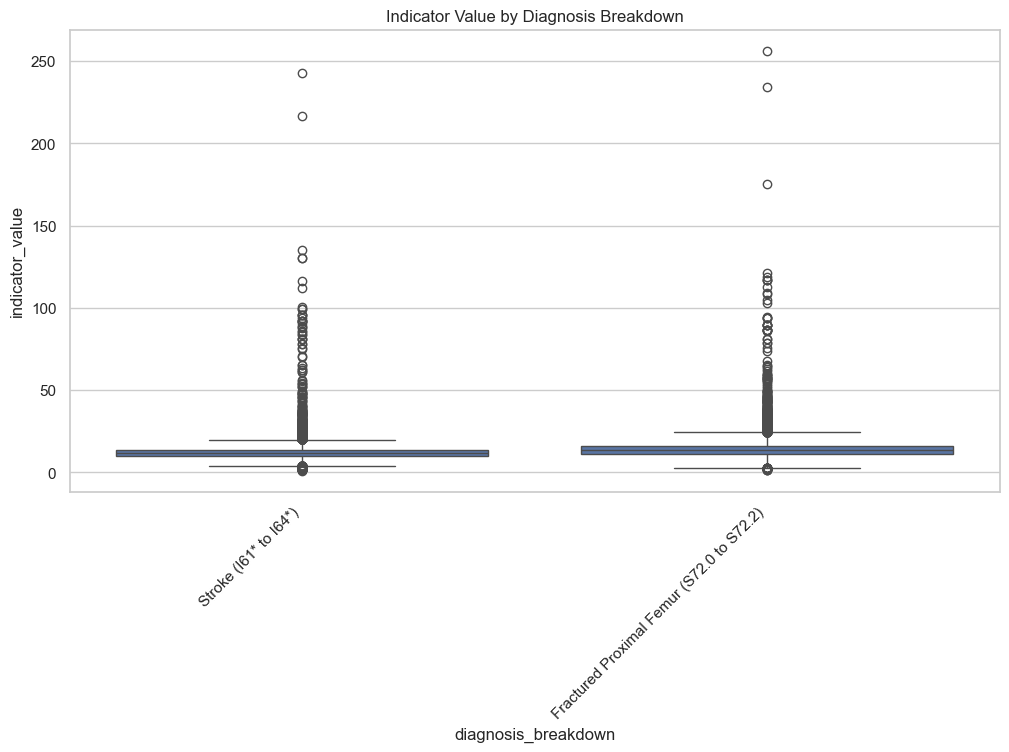

In [26]:
# Boxplot of Indicator Value vs Age Breakdown
sns.boxplot(x='age_breakdown', y='indicator_value', data=df)
plt.title("Indicator Value by Age Breakdown")
plt.show()

# Boxplot: Indicator Value vs Diagnosis Breakdown
plt.figure(figsize=(12,6))
sns.boxplot(x='diagnosis_breakdown', y='indicator_value', data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Indicator Value by Diagnosis Breakdown")
plt.show()


# 7️⃣ Multivariate Analysis
Analyze relationships between multiple variables:
- Correlation matrix to check linear relationships among numeric variables
- Useful for identifying features that may impact target variable and potential multicollinearity


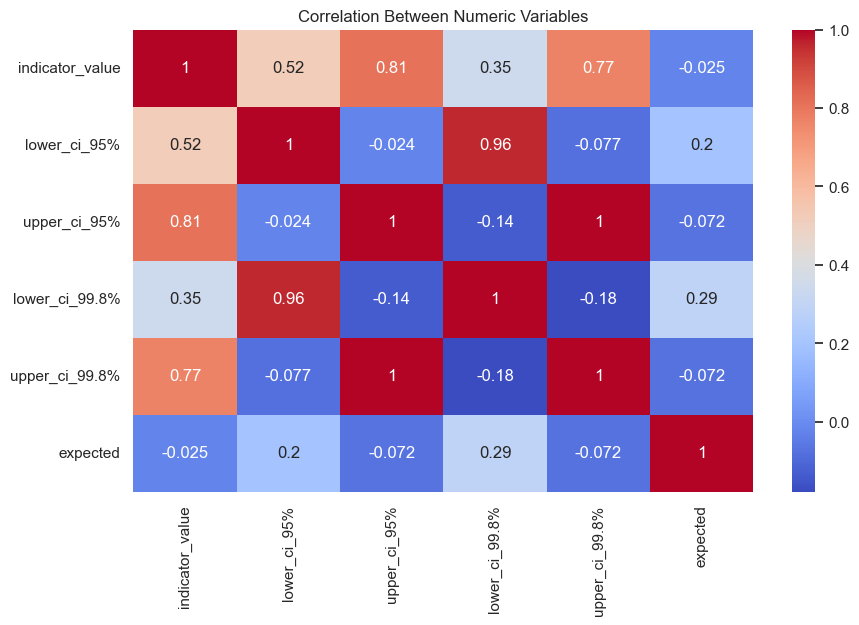

In [25]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Variables")
plt.show()

# 8️⃣ Next Steps / Observations

After performing the exploratory data analysis, here are the key takeaways:

1. **Feature Insights**
   - Columns like `diagnosis_breakdown`, `age_breakdown`, and `sex_breakdown` are important categorical features that may influence readmission risk.
   - Numeric columns like `indicator_value`, `numerator`, `denominator`, and `expected` can be strong predictors.

